In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
#seeing what is in the database 
# inspector = inspect(engine)
# inspector.get_table_names()

In [11]:
#Uncomment to inspect each database

#data for Measurements table 
#columns = inspector.get_columns('measurement')
#for x in columns:
#    print(x['name'], x['type'])

#data for stations table
# columns = inspector.get_columns('station')
# for x in columns:
#     print(x['name'], x['type'])


In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement =  Base.classes.measurement
station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

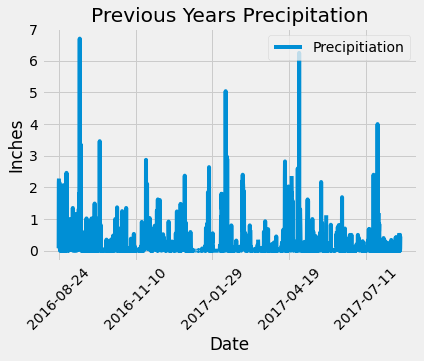

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
# Calculate the date 1 year ago from the last data point in the database
previous_year= dt.datetime.strptime(date, '%Y-%m-%d') - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= previous_year).order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitiation'])

# Sort the dataframe by date
precipitation_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title='Previous Years Precipitation',rot=45)
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.savefig('Images/precipitation_df.png')
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitiation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
stations= session.query(station)
print('{} stations '.format(stations.count()))

9 stations 


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(f'Most active stations')
print(f'Station, count')
print(f'--------------')
active_stations

Most active stations
Station, count
--------------


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Most active station according to counts 
top_station= active_stations[0][0]
print(f'Most active station is: {top_station}')

Most active station is: USC00519281


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperatures = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == top_station).all()
print(f'Low : {temperatures[0][0]}')
print(f'High : {temperatures[0][1]}')
print(f'avg : {temperatures[0][2]}')

Low : 54.0
High : 85.0
avg : 71.66378066378067


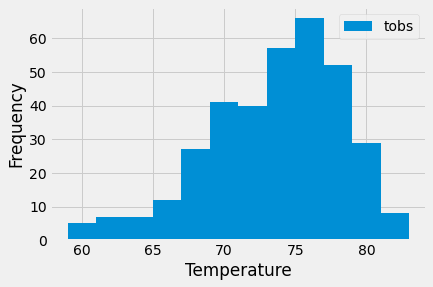

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_year_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == top_station).\
    filter(measurement.date >= previous_year).group_by(measurement.date).all()

previous_year_temp_df = pd.DataFrame(data=previous_year_temp, columns=['date','tobs'])
previous_year_temp_df = previous_year_temp_df.set_index('date', drop=True)

plt.hist(previous_year_temp_df['tobs'],12,label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.savefig('Images/Histogram.png')
plt.show()